In [2]:
from plot_utilities import matplotlib_nikita_style
matplotlib_nikita_style()

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

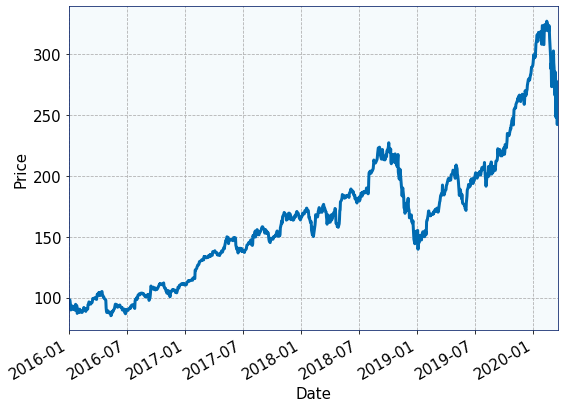

In [8]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np


# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2020-03-20')
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')

            Adj Close
Date                 
2015-12-31        NaN
2016-01-04   0.000855
2016-01-05  -0.025059
2016-01-06  -0.019570
2016-01-07  -0.042205
            Adj Close
Date                 
2015-12-31        NaN
2016-01-04   0.000855
2016-01-05  -0.025379
2016-01-06  -0.019764
2016-01-07  -0.043121
         Adj Close
count  1060.000000
mean      0.001016
std       0.017469
min      -0.128647
25%      -0.005640
50%       0.000942
75%       0.009044
max       0.119808
            Adj Close
Date                 
2020-03-13   2.832681
2020-03-16   2.468265
2020-03-17   2.576795
2020-03-18   2.513715
2020-03-19   2.494455


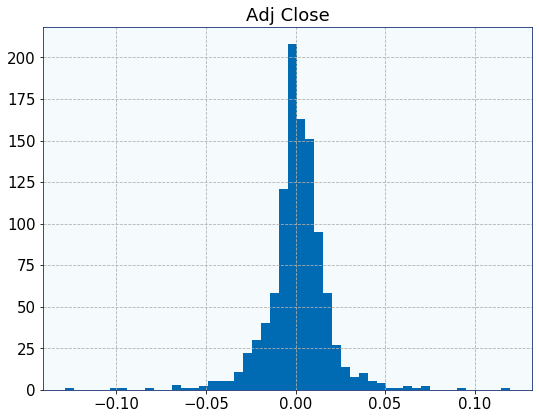

In [17]:
# Close price
daily_close = data[['Adj Close']]

# Daily return
daily_pct_change = daily_close.pct_change()
print(daily_pct_change.head())

# Daily log return
daily_log_returns = np.log(daily_close.pct_change()+1)
print(daily_log_returns.head())

daily_pct_change.hist(bins=50)
print(daily_pct_change.describe())

In [14]:
# Last day of the month
monthly = data.resample('BM').apply(lambda x: x[-1])

# Monthly return
print(monthly.pct_change().tail())

# Quarter mean
quarter = data.resample("4M").mean()

# Quarter return
print(quarter.pct_change().tail())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-11-29  0.078304  0.075571  0.120711  0.074329   0.077554 -0.665012
2019-12-31  0.087509  0.095821  0.088830  0.098784   0.098784  1.162394
2020-01-31  0.106922  0.098747  0.064832  0.054010   0.054010  0.979934
2020-02-28 -0.198392 -0.137195 -0.168413 -0.116798  -0.114701  1.138826
2020-03-31 -0.038366 -0.091843 -0.053672 -0.104551  -0.104551 -0.364377
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2018-12-31  0.033765  0.037492  0.024439  0.029014   0.033560  0.574930
2019-04-30 -0.118484 -0.120055 -0.112089 -0.114112  -0.109432 -0.261715
2019-08-31  0.121102  0.122371  0.120482  0.119225   0.125347 -0.065154
2019-12-31  0.245235  0.241966  0.247277  0.247708   0.253746 -0.066806
2020-04-30  0.213458  0.225837  0.206731  0.215595   0.218985  0

            Adj Close
Date                 
2020-03-13   2.832681
2020-03-16   2.468265
2020-03-17   2.576795
2020-03-18   2.513715
2020-03-19   2.494455


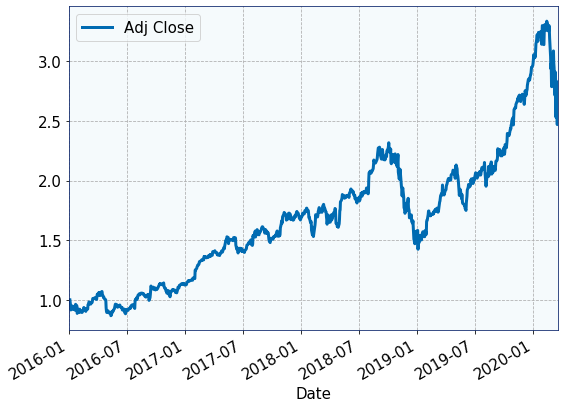

In [18]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return.tail())
cum_daily_return.plot()

[*********************100%***********************]  4 of 4 completed


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e373240>,
      dtype=object)

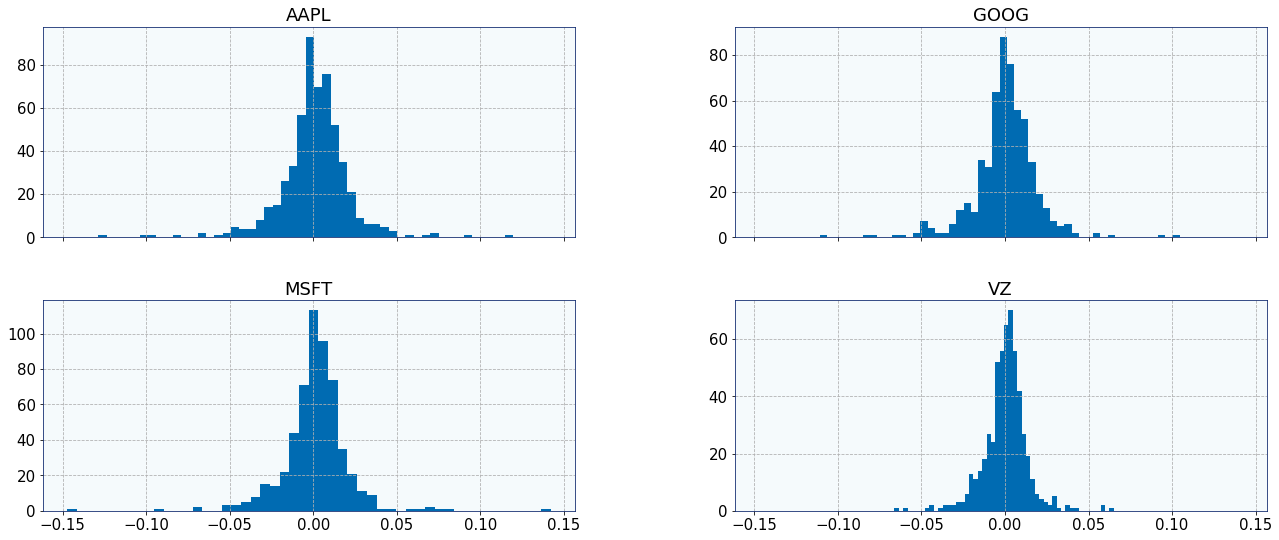

In [19]:
ticker = ['AAPL','VZ','MSFT','GOOG']

stock = yf.download(ticker,'2018-01-01')

daily_pct_change = stock['Adj Close'].pct_change()
daily_pct_change.hist(bins=50, sharex=True, figsize=(20,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11eb9b6d8>,
      dtype=object)

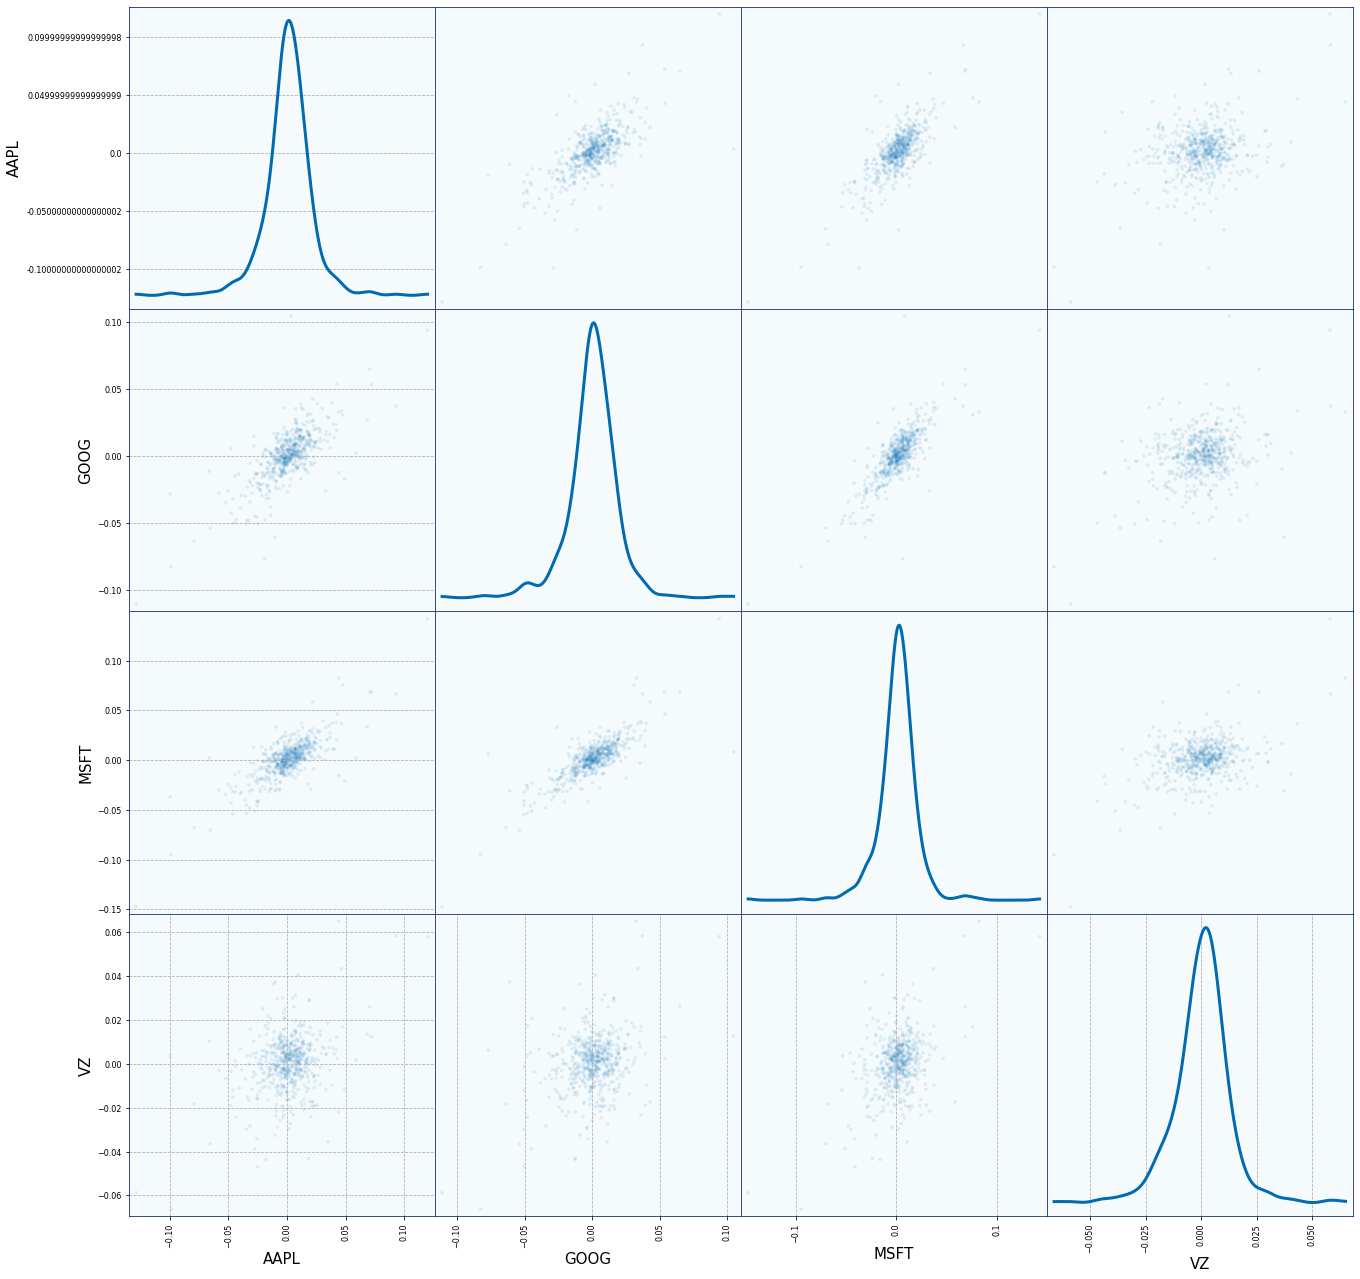

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(20,20))